# Proyecto 1 - Inteligencia de negocios ISIS 3301

Por:

- Juan Sebastián Ramírez 201923800 

- Andrés Santiago Triana 201923265 

- Gabriela García 201912531 

## Comprensión del negocio y enfoque analítico

### Comprensión del negocio 

El negocio que se nos presenta es el de un modelo de salud para enfermedades complejas como lo puede ser el cáncer. Hay que tener en cuenta que este modelo se puede presentar de muchas maneras, la salud varía según si las organizaciones son privadas o públicas, según las leyes de los países, los seguros de los usuarios, etc. Sin embargo, en términos generales, lo que se busca para este caso específico es poder tener buenas predicciones acerca de si un paciente requiere un ensayo clínico o no. Esto se debe a que no hacer los ensayos a quienes lo necesitan tiene muchas implicaciones, se pierde dinero de la organización, el usuario pierde su tiempo de manera innecesaria, se genera estrés en él, se puede poner en riesgo innecesario al usuario y finalmente, se pierde el tiempo de los doctores (que también representa dinero) que en muchos países de bajos recursos es vital. 

### Objetivo Principal 

- Apoyar las decisiones de los médicos acerca de si un paciente va a requerir ensayos clínicos para cáncer. 

### Objetivos Secundarios 

- Mejorar la comprensión acerca de qué palabras en el lenguaje son las que puede implicar que se requieran hacer ensayos clínicos o no. 

- Proveer un modelo relativamente veloz, dado que lo ideal sería permitir reducciones en los tiempos que un doctor debe tomar para poder saber si un paciente va a requerir un ensayo clínico. 

- Tener porcentajes de acierto relativamente altos, dado que es un tema de salud, los errores implican afectación en muchas personas. 

## Comprensión y preparación de los datos 

Para poder realizar un modelo predictivo de la información de los pacientes es muy importante enteder los datos dados por el negocio.

### Importación e Instalación de librerias

Debido a que en este proyecto es necesario realizar procesamiento de texto, es necesario instalar ciertas librerias para el manejo del lenguaje inglés. (Contractions, inflex, etc.)

In [1]:
# Librería para manejar las contracciones que se presentan en el inglés.
!pip install contractions

In [2]:
# librería para manejar las flexiones gramaticales en el idioma inglés.
!pip install inflect
!pip install pandas-profiling==2.7.1

In [3]:
pip install pandas==1.2.0

Note: you may need to restart the kernel to use updated packages.


In [4]:
# librería Natural Language Toolkit, usada para trabajar con textos 
import nltk
# Punkt permite separar un texto en frases.
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/santiagotriana/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/santiagotriana/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [6]:
# Descarga todas las palabras vacias, es decir, aquellas que no aportan nada al significado del texto
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/santiagotriana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
# Descarga de paquete WordNetLemmatizer, este es usado para encontrar el lema de cada palabra
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/santiagotriana/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True


Además es necesario importar las librerias necesarias para la realización del proyecto.

In [8]:
# Librerías para manejo de datos
import math
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar
import numpy as np
np.random.seed(3301)
import pandas as pd
# Para preparar los datos
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler
# Para crear el arbol de decisión 

# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
#Librerías para la visualización
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns
import sklearn
import seaborn as sns; sns.set()  # for plot styling

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering

from pandas_profiling import ProfileReport

import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.neural_network import MLPClassifier


from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, plot_precision_recall_curve
from sklearn.base import BaseEstimator, ClassifierMixin

import matplotlib.pyplot as plt

Además establecemos las siguientes funciones que nos van a ayudar más adelante en cada uno de los pasos a seguir. 

In [9]:
#Estos metodos se usan para limpiar los registrados pasados por parametro

def remove_non_ascii(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    new_words = []
    for word in words:
        new_word = word.lower()
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    p = inflect.engine()
    new_words = []
    if(words==None): return new_words
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

stop_words = set(stopwords.words('english'))

def remove_stopwords(words):
    new_words =[]
    for word in words:
        if word not in stop_words:
            new_words.append(word)
    return new_words

def preprocessing(words):
    #print("1 - " + str(words) + "\n")
    words = to_lowercase(words)
    #print("2 - " + str(words) + "\n")
    words = replace_numbers(words)
    #print("3 - " + str(words) + "\n")
    words = remove_punctuation(words)
    #print("4 - " + str(words) + "\n")
    words = remove_non_ascii(words)
    #print("5 - " + str(words) + "\n")
    words = remove_stopwords(words)
    #print("6 - " + str(words) + "\n\n")
    return words



#Estos metodos se usan para normalizar



def stem_words(words):
    ls = LancasterStemmer()
    rta = [ls.stem(word) for word in words]
    return rta

def lemmatize_verbs(words):
    wnl = WordNetLemmatizer()
    rta = [wnl.lemmatize(word) for word in words]
    return rta


def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems + lemmas



Ahora debemos importar los datos dados por el negocio, serán almacenados en la variable **df_pacientes**, utilizando el encoding utf-8 y poniendo los nulos en los valores de *NaN*. 

In [10]:
df_pacientes=pd.read_csv('datos/clinical_trials_on_cancer_data_clasificacion.csv', sep=',',
                         encoding = 'utf-8',
                         na_values={'-','NaN'})
df_pacientes.shape

(12000, 2)

Como podemos ver los datos están almacenados en 2 columnas, y son **12000** en total. Vamos a solicitar una muestra de los primeros 10 datos para leer el cotenido de estos primeros registros. 

In [11]:
df_pacientes.head(10)

,label,study_and_condition
0,__label__0,study interventions are Saracatinib . recurren...
1,__label__1,study interventions are Stem cell transplantat...
2,__label__0,study interventions are Lenograstim . recurren...
3,__label__0,study interventions are Doxorubicin . stage ii...
4,__label__1,study interventions are Poly I-C . prostate ca...
5,__label__1,study interventions are Bevacizumab . stage ii...
6,__label__0,study interventions are Carboplatin . stage ii...
7,__label__0,study interventions are Vidarabine . stage iv ...
8,__label__1,study interventions are Dexamethasone 21-phosp...
9,__label__1,study interventions are Microwave ablation . h...


Como podemos ver en las muestras y en la documentación, la información del estudio y de la condición *(study_and_condition)* se encuentran en la misma columna separadas por un punto, además, si la persona necesita aplica para examenes de cancer se usará la convención _ _label_ _ 0, y _ _label_ _ 1 en caso contrario. Se realizarán los siguientes cambios para mayor practicidad en el análisis y para poder facilitar el análisis de la información más adelante:

1. Se dividirá la columna **study_and_condition** en dos columnas, la primera llamanda **study** y la seugnda llamanda **condition**. Esta primera va a contener la información que se encuentra en la primera sección antes del punto del registro, y la segunda almacenará el resto.

2. Se reemplazará el *\_label_0* por un ***1***, para indicar que la persona es elegible para examenes con este valor.

3. Se reemplazará el *\_label_1* por un ***0***, para indicar que la persona **NO** es elegible para examenes de cancer. 

>Nota: Los cambios #2 y #3 se hacen para practicidad en el análisis, teniendo en cuenta que el 1 se relaciona tradicionalmente con un positivo/true y el 0 con un negativo/false


In [12]:
data_t = df_pacientes
data_t = data_t.drop("study_and_condition",1)
data_t["study"] = [x.split('.')[0].strip() for x in df_pacientes["study_and_condition"]]
data_t["condition"] = [x.split('.')[1].strip() for x in df_pacientes["study_and_condition"]]
data_t["label"] = df_pacientes["label"]
data_t['label'].replace('__label__0','1',inplace=True)
data_t['label'].replace('__label__1','0',inplace=True)

data_t.head(10)


,label,study,condition
0,1,study interventions are Saracatinib,recurrent verrucous carcinoma of the larynx di...
1,0,study interventions are Stem cell transplantation,hodgkin lymphoma diagnosis and history of cong...
2,1,study interventions are Lenograstim,recurrent adult diffuse mixed cell lymphoma di...
3,1,study interventions are Doxorubicin,stage iii diffuse large cell lymphoma diagnosi...
4,0,study interventions are Poly I-C,prostate cancer diagnosis and unresolved iraes...
5,0,study interventions are Bevacizumab,stage iiic primary peritoneal cancer diagnosis...
6,1,study interventions are Carboplatin,stage iib uterine sarcoma diagnosis and patien...
7,1,study interventions are Vidarabine,stage iv childhood small noncleaved cell lymph...
8,0,study interventions are Dexamethasone 21-phosp...,non secretory multiple myeloma
9,0,study interventions are Microwave ablation,hepatic neoplasms diagnosis and severe renal d...


Como podemos ver los datos ya son más legibles, por lo que vamos a empezar a analizarlos para entender más a fondo estaditicas en ellos. (Su distribución, medias, máximos, etc.)

In [13]:
textos = data_t.copy()
textos['Conteo_study'] = [len(x) for x in textos['study']]
textos['Max_study'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['study']]
textos['Min_study'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['study']]

textos['Conteo_condition'] = [len(x) for x in textos['condition']]
textos['Max_condition'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['condition']]
textos['Min_condition'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['condition']]

# Se realiza un perfilamiento de los datos con la librería pandas profiling
ProfileReport(textos)

Summarize dataset: 23it [00:04,  4.73it/s, Completed]                           
Render HTML: 100%|████████████████████████████████| 1/1 [00:00<00:00,  1.56it/s]


In [14]:
textos.head(10)

,label,study,condition,Conteo_study,Max_study,Min_study,Conteo_condition,Max_condition,Min_condition
0,1,study interventions are Saracatinib,recurrent verrucous carcinoma of the larynx di...,35,13,3,212,15,2
1,0,study interventions are Stem cell transplantation,hodgkin lymphoma diagnosis and history of cong...,49,15,3,172,11,2
2,1,study interventions are Lenograstim,recurrent adult diffuse mixed cell lymphoma di...,35,13,3,191,12,2
3,1,study interventions are Doxorubicin,stage iii diffuse large cell lymphoma diagnosi...,35,13,3,230,9,2
4,0,study interventions are Poly I-C,prostate cancer diagnosis and unresolved iraes...,32,13,3,197,15,2
5,0,study interventions are Bevacizumab,stage iiic primary peritoneal cancer diagnosis...,35,13,3,175,12,2
6,1,study interventions are Carboplatin,stage iib uterine sarcoma diagnosis and patien...,35,13,3,107,11,2
7,1,study interventions are Vidarabine,stage iv childhood small noncleaved cell lymph...,34,13,3,90,10,2
8,0,study interventions are Dexamethasone 21-phosp...,non secretory multiple myeloma,50,13,3,30,9,3
9,0,study interventions are Microwave ablation,hepatic neoplasms diagnosis and severe renal d...,42,13,3,103,11,2


A partir de las estadisticas generadas anteriormente podemos sacar ciertas conclusiones:

- Label: De label no hay tantos datos relevantes, solo se tienen dos tipos de variables y esto causa claramente que sus datos no sean únicos, además no tiene nulos. Se tienen la misma cantidad de entradas en las que se requieren ensayos y en las que no. 

- Study: Una columna que nos sorprendió bastante, creíamos que los datos de esta iban a ser bastante únicos, sin embargo, nos dimos cuenta de que nuestra suposición no era correcta, dado que solo tiene un 13.8% de Unique. Esto se traduce en que los datos de study en su mayoría están repetidos, algo importante, pues es más fácil que el modelo encuentre patrones si se pueden agrupar con dicha información. Solo hay 1660 variaciones de study y se evidencia que las más repetidas tienen que ver con estudios en anticuerpos. 

- Condition: La historia es muy diferente a study, en conditon se puede ver un porcentaje alto de únicos (97.4%), algo que tiene sentido, pues hay muchas maneras de armar una frase para expresar la condición que puede tener un paciente. También se evidencia que los conditions más repetidos son los de lymphoma, a pesar de que no sean tantas repeticiones como en study, podrían tener peso en los futuros modelos. 

- Conteo_study: Para el conteo de las letras en las frases de study se pueden observar datos relevantes como una media de 38.7 letras, con un máximo de 142 letras y un mínimo de 25. 

- Max_study: La cantidad máxima de letras por palabra en promedio para study fue de 13.3, con una mínima cantidad de 13 letras y una máxima de 59  

- Min_study: El mínimo de palabras de study es tan poco variado que el programa lo toma como categórico, dado que solo están palabras de mínimo 1, 2 o 3 letras, la gran mayoría teniendo en promedio 3 letras.  

- Conteo_condition: La cantidad promedio del conteo de letras en condition fue de 131.89, como se puede ver, se tienen en promedio 3 veces más letras que en study. La cantidad mínima de letras fue de 0 y la máxima de 1042 

- Max_condition: El promedio de letras de la palabra más larga de las condiciones fue de 12.36, un poco más bajo que el de study. La cantidad mínima de letras fue de 0 y la máxima de 32 

- Min_condition: El promedio de las palabras más cortas fue de 2.2, siendo el máximo 17 letras y el mínimo 2 letras. 


Esta información es valiosa para conocer la distribución de los registros con los que vamos a alimentar los modelos a lo largo del prouyecto. Ahora vamos a buscar nulos en los datos, para tomar desiciones sobre estos.

In [15]:
data_t.isnull().sum()

label        0
study        0
condition    0
dtype: int64

Ahora bien, como la información que vamos a usar para alimentar el modelo está en lenguaje natural, hay ciertas cosas que debemos realizar sobre estos registros para poder usarlos como datos que alimenten el modelo. Se planteran entonces 3 cosas principales.

1. Tokenizar las frases en palabras, de manera que se pueda tener una lista de palabras que se usan en cada uno de los registros. Esto será nuestro **words** y **words_study**

2. Corregir contracciones que son usadas en el ingles, para que estas sean separadas en las palabras que significan "realmente". De esta forma una palabra como "it's" se va a reemplazar por "it is".

3. Se realizará además una eliminación en el ruido de las palabras, entre estas cosas están elementos como;
    - Poner todo en minusculas.
    - Remover puntuaciones.
    - Remover caracteres que no sean ASCII.
    - Reemplazar numeros por su nombre escriot en texto (ej: "10" por "ten")
    - Eliminar las *stopwords*, que son palabras sin significado como artículos, pronombres, preposiciones, etc.

4. Finalmente se realizará una estandarización de las palabras, eliminado los prefijos y sufijos (stems) y la conjugación de los verbos (lemmatize)

In [16]:
data_t['condition'] = data_t['condition'].apply(contractions.fix) #Aplica la corrección de las contracciones
data_t['study'] = data_t['study'].apply(contractions.fix) #Aplica la corrección de las contracciones

In [17]:
data_t['words'] = data_t['condition'].apply(word_tokenize).apply(preprocessing) #Aplica la eliminación del ruido
data_t['words_study'] = data_t['study'].apply(word_tokenize).apply(preprocessing) #Aplica la eliminación del ruido

data_t.head(10)

,label,study,condition,words,words_study
0,1,study interventions are Saracatinib,recurrent verrucous carcinoma of the larynx di...,"[recurrent, verrucous, carcinoma, larynx, diag...","[study, interventions, saracatinib]"
1,0,study interventions are Stem cell transplantation,hodgkin lymphoma diagnosis and history of cong...,"[hodgkin, lymphoma, diagnosis, history, congen...","[study, interventions, stem, cell, transplanta..."
2,1,study interventions are Lenograstim,recurrent adult diffuse mixed cell lymphoma di...,"[recurrent, adult, diffuse, mixed, cell, lymph...","[study, interventions, lenograstim]"
3,1,study interventions are Doxorubicin,stage iii diffuse large cell lymphoma diagnosi...,"[stage, iii, diffuse, large, cell, lymphoma, d...","[study, interventions, doxorubicin]"
4,0,study interventions are Poly I-C,prostate cancer diagnosis and unresolved iraes...,"[prostate, cancer, diagnosis, unresolved, irae...","[study, interventions, poly, ic]"
5,0,study interventions are Bevacizumab,stage iiic primary peritoneal cancer diagnosis...,"[stage, iiic, primary, peritoneal, cancer, dia...","[study, interventions, bevacizumab]"
6,1,study interventions are Carboplatin,stage iib uterine sarcoma diagnosis and patien...,"[stage, iib, uterine, sarcoma, diagnosis, pati...","[study, interventions, carboplatin]"
7,1,study interventions are Vidarabine,stage iv childhood small noncleaved cell lymph...,"[stage, iv, childhood, small, noncleaved, cell...","[study, interventions, vidarabine]"
8,0,study interventions are Dexamethasone 21-phosp...,non secretory multiple myeloma,"[non, secretory, multiple, myeloma]","[study, interventions, dexamethasone, 21phosph..."
9,0,study interventions are Microwave ablation,hepatic neoplasms diagnosis and severe renal d...,"[hepatic, neoplasms, diagnosis, severe, renal,...","[study, interventions, microwave, ablation]"


In [18]:
data_t['words'] = data_t['words'].apply(stem_and_lemmatize) #Aplica lematización y Eliminación de Prefijos y Sufijos.
data_t['words_study'] = data_t['words_study'].apply(stem_and_lemmatize) #Aplica lematización y Eliminación de Prefijos y Sufijos.

data_t.head()

,label,study,condition,words,words_study
0,1,study interventions are Saracatinib,recurrent verrucous carcinoma of the larynx di...,"[recur, verruc, carcinom, larynx, diagnos, pat...","[study, interv, saracatinib, study, interventi..."
1,0,study interventions are Stem cell transplantation,hodgkin lymphoma diagnosis and history of cong...,"[hodgkin, lymphom, diagnos, hist, congenit, he...","[study, interv, stem, cel, transpl, study, int..."
2,1,study interventions are Lenograstim,recurrent adult diffuse mixed cell lymphoma di...,"[recur, adult, diffus, mix, cel, lymphom, diag...","[study, interv, lenograstim, study, interventi..."
3,1,study interventions are Doxorubicin,stage iii diffuse large cell lymphoma diagnosi...,"[stag, ii, diffus, larg, cel, lymphom, diagnos...","[study, interv, doxorubicin, study, interventi..."
4,0,study interventions are Poly I-C,prostate cancer diagnosis and unresolved iraes...,"[prost, cant, diagnos, unresolv, ira, follow, ...","[study, interv, poly, ic, study, intervention,..."


In [19]:
data_t.to_csv("datos_limpios.csv")

Finalmente tenemos las palabras que vamos a usar en listas, limpias para ser usadas en algún modelo. Sin embargo, vamos a pasar estas variables categoricas (entiendase una palabra como una categoría a la que pertenece dicho registro) a variables numericas, para que puedan ser usadas de manera más amplia en los modelos y de forma estandar en cada uno de ellos. 

In [20]:
data_t['words'] = data_t['words'].apply(lambda x: ' '.join(map(str, x)))
data_t['words_study'] = data_t['words_study'].apply(lambda x: ' '.join(map(str, x)))

data_t

,label,study,condition,words,words_study
0,1,study interventions are Saracatinib,recurrent verrucous carcinoma of the larynx di...,recur verruc carcinom larynx diagnos paty must...,study interv saracatinib study intervention sa...
1,0,study interventions are Stem cell transplantation,hodgkin lymphoma diagnosis and history of cong...,hodgkin lymphom diagnos hist congenit hematolo...,study interv stem cel transpl study interventi...
2,1,study interventions are Lenograstim,recurrent adult diffuse mixed cell lymphoma di...,recur adult diffus mix cel lymphom diagnos cre...,study interv lenograstim study intervention le...
3,1,study interventions are Doxorubicin,stage iii diffuse large cell lymphoma diagnosi...,stag ii diffus larg cel lymphom diagnos stag i...,study interv doxorubicin study intervention do...
4,0,study interventions are Poly I-C,prostate cancer diagnosis and unresolved iraes...,prost cant diagnos unresolv ira follow pri bio...,study interv poly ic study intervention poly ic
...,...,...,...,...,...
11995,1,study interventions are Prednisolone hemisucci...,recurrent childhood large cell lymphoma diagno...,recur child larg cel lymphom diagnos known hyp...,study interv prednisolon hemisuccin study inte...
11996,1,study interventions are Bevacizumab,recurrent rectal cancer diagnosis and absolute...,recur rect cant diagnos absolv neutrophil coun...,study interv bevacizumab study intervention be...
11997,0,"study interventions are Antibodies, Monoclonal",recurrent lymphoblastic lymphoma diagnosis and...,recur lymphoblast lymphom diagnos intrathec in...,study interv antibody monoclon study intervent...
11998,1,study interventions are Vorinostat,colorectal cancer diagnosis and patients must ...,colorect cant diagnos paty must receiv least o...,study interv vorinost study intervention vorin...


Con dicho fin separaremos la columna **label** de los datos que queremos volver numeros (porque label ya es una variable numerica, debido a que fue convertida a binario anteriormente). Se aplicará ***OneHotEncoding*** en dichos valores, por lo que cada palabra quedará en una columna diferente dentro de los datos generados, el registro tendrá un **0** en la columna en caso que no use la columna y un **1** en caso contrario. 

In [21]:
X_data_words, X_data_words_study, y_data = data_t['words'], data_t['words_study'] ,data_t['label']
y_data = pd.to_numeric(y_data)
y_data.head(30)

0     1
1     0
2     1
3     1
4     0
5     0
6     1
7     1
8     0
9     0
10    0
11    1
12    1
13    0
14    0
15    1
16    0
17    1
18    1
19    0
20    1
21    1
22    0
23    1
24    0
25    1
26    1
27    0
28    0
29    1
Name: label, dtype: int64

In [22]:
dummy_words = CountVectorizer(binary=True)
X_dummy_words = dummy_words.fit_transform(X_data_words)
print(X_dummy_words.shape)
X_dummy_words.toarray()[0]
xdtf = pd.DataFrame(X_dummy_words.toarray())
xdtf=xdtf.add_prefix('condition_')

#Esto nos va a servir mas adelante para interpretar los resultados de los modelos
llaves_conditions = dummy_words.vocabulary_.keys()
llaves_conditions = list(llaves_conditions)

(12000, 9250)


In [23]:
dummy_words_study = CountVectorizer(binary=True)
X_dummy_words_study = dummy_words_study.fit_transform(X_data_words_study)
print(X_dummy_words_study.shape)
X_dummy_words_study.toarray()[0]
xdtf_study = pd.DataFrame(X_dummy_words_study.toarray())
xdtf_study=xdtf_study.add_prefix('study_')

#Esto nos va a servir mas adelante para interpretar los resultados de los modelos
llaves_study = dummy_words_study.vocabulary_.keys()
llaves_study = list(llaves_study)

(12000, 3174)


Es posible evidenciar que para cada columna (tanto **study** como **condition**) se tomaron todas las palabras y se transformaron a numericas, en donde words tenía 9250 palabras diferentes y words_study tenía 3174, para un total de **12424** columnas que se van a usar en el modelo, debido al **OneHotEncoding**. (Sin tener encuentra la columna objetivo con la que se llegaría a un total de **12425**).

Ahora visualizaremos las columnas generadas, verificando que si contengan valores binarios y san correctos. 

In [24]:
xdtf.head(10)

,condition_0,condition_1,condition_2,condition_3,condition_4,condition_5,condition_6,condition_7,condition_8,condition_9,condition_10,condition_11,...,condition_9238,condition_9239,condition_9240,condition_9241,condition_9242,condition_9243,condition_9244,condition_9245,condition_9246,condition_9247,condition_9248,condition_9249
0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
xdtf_study.head(10)

,study_0,study_1,study_2,study_3,study_4,study_5,study_6,study_7,study_8,study_9,study_10,study_11,...,study_3162,study_3163,study_3164,study_3165,study_3166,study_3167,study_3168,study_3169,study_3170,study_3171,study_3172,study_3173
0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0


Podemos verificar que nuestro procedimiento hasta ahora tiene muy buena pinta, por lo que procederemos a unificar toda la información que usaremos en los modelos en un solo dataframe (numericas generadas y variable objetivo). Juntamos todo en una variable que se llamará **dt_final**.

In [26]:

dt_final = xdtf_study.copy()
print(dt_final.shape)
condition_columns = xdtf.columns

for column in condition_columns:
    dt_final[column] = xdtf[column]

print(dt_final.shape)

(12000, 3174)
(12000, 12424)


In [27]:
dt_final['label'] = data_t['label']
print(dt_final.shape)

(12000, 12425)


In [28]:
dt_final.describe()

,study_0,study_1,study_2,study_3,study_4,study_5,study_6,study_7,study_8,study_9,study_10,study_11,...,condition_9238,condition_9239,condition_9240,condition_9241,condition_9242,condition_9243,condition_9244,condition_9245,condition_9246,condition_9247,condition_9248,condition_9249
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000,...,12000.000000,12000.000000,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,0.000083,0.000083,0.000083,0.000083,0.000083,0.000167,0.000167,0.000167,0.000083,0.00025,0.000083,0.000083,...,0.000083,0.000083,0.000333,0.000083,0.00025,0.000083,0.000083,0.000083,0.000083,0.018333,0.018333,0.000750
std,0.009129,0.009129,0.009129,0.009129,0.009129,0.012909,0.012909,0.012909,0.009129,0.01581,0.009129,0.009129,...,0.009129,0.009129,0.018255,0.009129,0.01581,0.009129,0.009129,0.009129,0.009129,0.134159,0.134159,0.027377
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Finalmente, es necesario buscar columnas duplicadas para que estas puedan ser removidas y no alteren los resultados de los modelos más adelante. 

In [29]:
# Verificamos que no hayan duplicados
str("La cantidad de duplicados es "+str(len(dt_final[dt_final.duplicated()])))

'La cantidad de duplicados es 13'

In [30]:
dt_final = dt_final.dropna()
dt_final = dt_final.drop_duplicates()
dt_final.shape

(11987, 12425)

Despues de todo este proceso de limpieza de datos tenemos nuestros datos limpios y listos para ser usados en los modelos. Un total de **11987** registros con **12425** columnas binarias.

## Modelado

### Arbol de decision - Por: Santiago Triana 201923265

#### Adaptar datos al modelo de árbol

Para poder utilizar los datos en el arbol de desición debemos asegurarnos que se encuentran en un tipo numerico, por lo que debemos desplegar los tipos de datos para cada una de las columnas.

In [31]:
dt_arbol = dt_final.copy()

def imprimir_tipos_datos(dt):
    lista_tipos = []

    tipos = dt.dtypes
    for tipo in tipos:
        if tipo not in lista_tipos:
            lista_tipos.append(tipo)

    print(lista_tipos)
    
imprimir_tipos_datos(dt_arbol)

[dtype('int64'), dtype('O')]


Como podemos ver hay 2 tipos de datos, numerico y object *(Si se consulta la documentación de pandas, nos podemos dar cuenta que dtype('0') significa type object)*, por lo que tenemos que transformar todas las columnas a tipo int.

In [32]:
cols = dt_arbol.columns
dt_arbol[cols] = dt_arbol[cols].apply(pd.to_numeric, errors='coerce')
dt_arbol = dt_arbol.dropna().astype(np.int64)
imprimir_tipos_datos(dt_arbol)

[dtype('int64')]


Es una buena práctica además, que exista una buena relación entre resultados positivos y negativos, por lo que verificaremos qué tal está la relación de la variable objetivo en los registros dados.

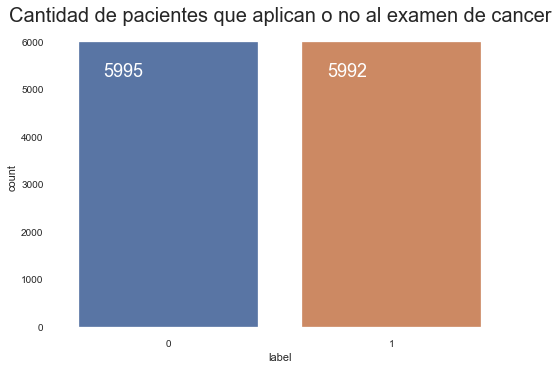

In [33]:
ax = sns.countplot(x='label', data=dt_arbol)
ax.set_title('Cantidad de pacientes que aplican o no al examen de cancer', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

In [34]:
str((100*5992)/5995)+"%"

'99.94995829858215%'

Es posible ver que existe un balance con una diferencia menor al 0,6% de la cantidad de los datos 1 vs. 0, (positivos vs. negativos), por lo que es prudente seguir adelante sin tener que aplicar prácticas de oversampling o undersampling.

Teniendo todos los datos en tipos numericos, podemos a empezar a usarlos en nuestro modelo de árbol. 

#### Construir X y Y del modelo 

Crearemos las variables X y Y del árbol, donde las primeras contienen las variables de desición y la segunda la objetivo.

In [35]:
Y_arbol = dt_arbol['label']
X_arbol = dt_arbol.drop(['label'], axis=1)
X_arbol

,study_0,study_1,study_2,study_3,study_4,study_5,study_6,study_7,study_8,study_9,study_10,study_11,...,condition_9238,condition_9239,condition_9240,condition_9241,condition_9242,condition_9243,condition_9244,condition_9245,condition_9246,condition_9247,condition_9248,condition_9249
0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
11996,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
11997,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
11998,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
Y_arbol

0        1
1        0
2        1
3        1
4        0
        ..
11995    1
11996    1
11997    0
11998    1
11999    1
Name: label, Length: 11987, dtype: int64

Dividiremos nuestros **X** y **Y** en sets de entrenamiento y prueba, con una relación de 20-80.

Además, crearemos nuestro árbol utilizando como criterio la entropia, con un random_state de 0. Alimentaremos dicho modelo con nuestros X y Y de entrenamiento y buscaremos las predicciones de y usando los test de X. Mas adelante, al evaluar nuestro modelo utilizaremos dicha predicción, para establecer el nivel de certeza que puede tener el arbol generado. 

In [37]:
X_train_arbol, X_test_arbol, Y_train_arbol, Y_test_arbol = train_test_split(X_arbol, Y_arbol, test_size=0.2, random_state=0)
tree = sklearn.tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
tree = tree.fit(X_train_arbol,Y_train_arbol)
y_pred_arbol = tree.predict(X_test_arbol)

#### Importancia de cada palabra en el modelo

Una vez se tiene el árbol generado, vamos a verificar qué tanta influencia tiene cada una de las columnas (atributo) en la predicción del modelo. En este caso se trata de qué palabra tiene más influencia en la toma de desición del arbol.

In [38]:
importancia= tree.feature_importances_
importancia

array([0., 0., 0., ..., 0., 0., 0.])

In [39]:
importancia_atributo = pd.DataFrame(data={"Atributo": X_train_arbol.columns,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,condition_3849,0.025892
1,condition_5488,0.024526
2,condition_8568,0.017613
3,condition_6260,0.016001
4,condition_2430,0.012989
...,...,...
12419,condition_1089,0.000000
12420,condition_1090,0.000000
12421,condition_1091,0.000000
12422,condition_1092,0.000000


Debido a que tenemos la información con identificadores de las palabras, tenemos que treducir estos primeros lugares a palabras que podamos entender.

In [40]:
llaves = dummy_words.vocabulary_.keys()
llaves = list(llaves)
print("Primero: " + llaves[3849])
print("Segundo: " + llaves[5488])
print("Tercero: " + llaves[8568])
print("Cuarto: " + llaves[6260])
print("Quinto: " + llaves[2430])

Primero: neuroginic
Segundo: twin
Tercero: systematic
Cuarto: narcotics_sedatives
Quinto: pelvic


Es posible establecer entonces la siguiente jerarquía en la influencia de la toma de desiciones del modelo. 

- Primero: neuroginic
- Segundo: twin
- Tercero: systematic
- Cuarto: narcotics_sedatives
- Quinto: pelvic

Esta información la verificaremos más adelante. 

### KNN - Por: Gabriela García 201912531

A continuación se implementara el algoritmo KNN con el objetivo de clasificar los pacientes que requieren ensayos clinicos y los pacientes que no. Para esto se uso como variable objetivo 'label'. Esta columna ya indica si el pacientes es elegible o no

Para esto se separa dos conjuntos Y con la variable objetivo y X con las columnas sin la variable objetivo. Asimismo, se normaliza el conjunto X para que tanto X_train como X_test queden normalizados.

In [41]:
# Realizamos una copia de los datos para el modelo
dt_final_knn = dt_final.copy()

Y = dt_final_knn['label']
X = dt_final_knn.drop(['label'], axis=1)

#feature Scaling
sc_X = StandardScaler()
X_norm = sc_X.fit_transform(X.copy())

#Dividir los datos en entrenamiento y test
X_train_knn, X_test_knn, Y_train_knn, Y_test_knn = train_test_split(X_norm, Y, test_size=0.2, random_state=0)

El algoritmo KNN tiene como hiperparametros el numero de vecinos. Con el objetivo de asignarle un valor con el que se obtengan buenos resultados se usa la cantidad de valores en el conjunto Y_test. Se obtiene la raiz de esta y se usa su aproximación como numero de vecinos

In [42]:
math.sqrt(len(Y_test_knn))

48.96937818678118

Se obtuvo 48.969 por lo que se aproxima a 49 para la construcción de modelo

In [43]:
classifier = KNeighborsClassifier(n_neighbors=49,p=2,metric='euclidean')
classifier.fit(X_train_knn,Y_train_knn)

KNeighborsClassifier(metric='euclidean', n_neighbors=49)

### Redes Neuronales - Por: Juan Sebastián Ramírez 201923800
En primer lugar, se hace una copia de los datos

In [44]:
dt_redes = dt_final.copy()

Por el desarrollo de los arboles, se sabe que los datos no son numericos completamente, por lo cual se hacen los cambios respectivos

In [45]:
cols = dt_redes.columns
dt_redes[cols] = dt_redes[cols].apply(pd.to_numeric, errors='coerce')
dt_redes = dt_redes.dropna().astype(np.int64)
imprimir_tipos_datos(dt_redes)

[dtype('int64')]


Los datos quedan listos como numéricos

Ahora hay que dividirlos, la predicción se va a hacer con label, por lo tanto, estos se vuelven los datos de Y

In [46]:
Y_redes = dt_redes['label']
X_redes = dt_redes.drop(['label'], axis=1)
X_redes

,study_0,study_1,study_2,study_3,study_4,study_5,study_6,study_7,study_8,study_9,study_10,study_11,...,condition_9238,condition_9239,condition_9240,condition_9241,condition_9242,condition_9243,condition_9244,condition_9245,condition_9246,condition_9247,condition_9248,condition_9249
0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
11996,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
11997,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0
11998,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
Y_redes

0        1
1        0
2        1
3        1
4        0
        ..
11995    1
11996    1
11997    0
11998    1
11999    1
Name: label, Length: 11987, dtype: int64

Ahora se entrena el modelo con la red neuronal. Las redes son particularmente buenas, pero a la vez tienen parámetros bastante complejos, lo que puede dificultar su interpretación y modelamiento. Dada esta información, se hace una prueba con casi todos los parámetros estandarizados, menos el solver, dado que este si se sabe que el  lbfgs funciona bien para datasets no tan grandes

In [48]:
X_train_redes, X_test_redes, Y_train_redes, Y_test_redes = train_test_split(X_redes, Y_redes, test_size=0.2, random_state=0)
neural_network = sklearn.neural_network.MLPClassifier(solver='lbfgs')
neural_network = neural_network.fit(X_train_redes,Y_train_redes)
y_pred_redes = neural_network.predict(X_test_redes)

## Evaluación 
### Arbol de decisión - Por: Santiago Triana 201923265

#### Métricas del modelo

Procederemos ahora sí a verificar las predicciones realizadas por el arbol, que fueron generadas usando los datos de test separados en la sección "Modelo". Buscaremos metricas como precisión, recall, etc. 

In [49]:
confusion_matrix(Y_test_arbol, y_pred_arbol)
y_pred_train_arbol = tree.predict(X_train_arbol)
y_pred_test_arbol = tree.predict(X_test_arbol)
print(classification_report(Y_test_arbol, y_pred_test_arbol))

y_pred_train_arbol_oficial = y_pred_train_arbol.copy()
y_pred_test_arbol_oficial = y_pred_test_arbol.copy()

              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1245
           1       0.75      0.80      0.78      1153

    accuracy                           0.78      2398
   macro avg       0.78      0.78      0.78      2398
weighted avg       0.78      0.78      0.78      2398



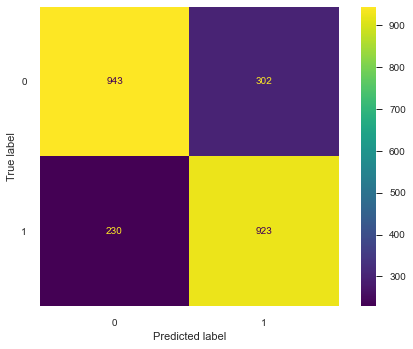

In [50]:
plot_confusion_matrix(tree, X_test_arbol, Y_test_arbol)  
plt.show() 

In [51]:
print('Exactitud: %.2f' % accuracy_score(Y_test_arbol, y_pred_arbol))
print("Recall: {}".format(recall_score(Y_test_arbol,y_pred_arbol, average='micro')))
print("Precisión: {}".format(precision_score(Y_test_arbol,y_pred_arbol, average='micro')))
print("Puntuación F1: {}".format(f1_score(Y_test_arbol,y_pred_arbol, average='micro')))

Exactitud: 0.78
Recall: 0.7781484570475397
Precisión: 0.7781484570475397
Puntuación F1: 0.7781484570475397


Podemos ver usando las métricas y nuestra matríz de confusión, que nuestro modelo tiene un nivel de certeza medio-alto y que las clasificaciones las está realizando correctamente con respecto a los pacientes que deben o no ser candidatos para el tratamiento de cancer. 

Sin embargo buscaremos en esta evaluación un mejor modelo, que pueda darnos más información precisa, buscando mejorar estas metricas anteriormente mostradas. 

#### Busqueda de nuevos hiperparámetros

Realizaremos iteraciones con diferentes criterios, max_depth y min_samples_split, para así buscar metricas más acertadas y que nos muestren mejores resultados a la hora de recomendar o no un paciente para el tratamiento.

In [52]:
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)
param_grid = {'criterion':['gini', 'entropy'],'max_depth':[4,5,6,10,15],'min_samples_split':[2, 3, 4, 5]}
arbol = sklearn.tree.DecisionTreeClassifier(random_state=0)
mejor_modelo = GridSearchCV(arbol, param_grid, cv=particiones)

mejor_modelo.fit(X_train_arbol, Y_train_arbol)


GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 10, 15],
                         'min_samples_split': [2, 3, 4, 5]})

In [53]:
mejor_modelo.best_params_

{'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 2}

Podemos identificar que los resultados son los siguientes hiperparámetros:
>'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 2 

Por lo que procederemos a usarlos y compararlo con los resultados establecidos anteriormente por el modelo.

In [54]:
arbol_final = mejor_modelo.best_estimator_
y_pred_train_arbol = arbol_final.predict(X_train_arbol)
y_pred_test_arbol = arbol_final.predict(X_test_arbol)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train_arbol, y_pred_train_arbol))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test_arbol, y_pred_test_arbol))

Exactitud sobre entrenamiento: 0.77
Exactitud sobre test: 0.72


In [55]:
print(classification_report(Y_test_arbol, y_pred_test_arbol))

              precision    recall  f1-score   support

           0       0.84      0.58      0.68      1245
           1       0.66      0.88      0.75      1153

    accuracy                           0.72      2398
   macro avg       0.75      0.73      0.72      2398
weighted avg       0.75      0.72      0.72      2398



Podemos ver que el promedio total a disminuido y la brecha entre las presiciones y recalls a aumentado. Esto significa que nuestro modelo a presentado un sobreajuste y se ha adaptado fuertemente a los datos con los que se entrenó. Esto se puede deber a una alta cantidad de profundidad.

Podemos entonces concluir que el modelo presentado en primera instancia es bastante acertado, con un promedio total más alto que este último.

#### Análisis de los atributos influyentes


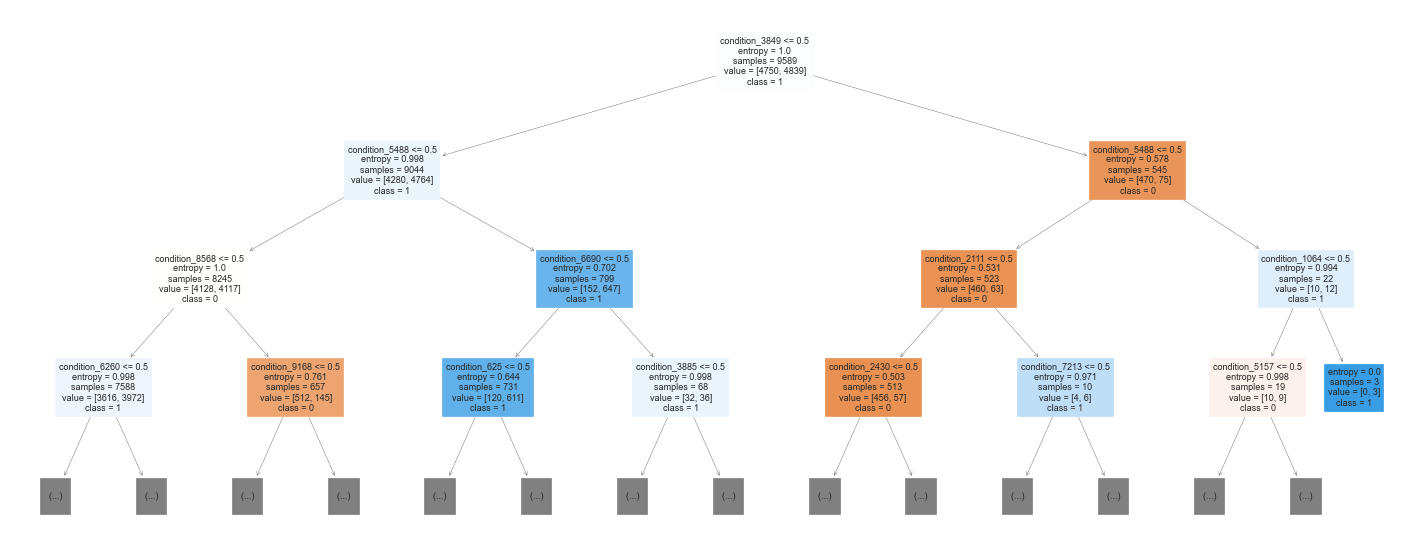

In [56]:
fig = plt.figure(figsize=(25,10))
_ = sklearn.tree.plot_tree(tree, max_depth=3, feature_names=X_arbol.columns, class_names=["0", "1"], filled=True, fontsize=9)

Al igual que presentado anteriormente, se sigue la misma jerarquía mostrada en el modelo, por lo que logramos verificar que esa es realmente la influencia de cada una de las palabras en la toma de la desición de si un paciente es elegible o no. 

- Primero: neuroginic
- Segundo: twin
- Tercero: systematic
- Cuarto: narcotics_sedatives
- Quinto: pelvic




### KNN - Por: Gabriela García 201912531

In [57]:
y_pred_knn =  classifier.predict(X_test_knn)
cm= confusion_matrix(Y_test_knn,y_pred_knn)
cm

array([[ 115, 1130],
       [  19, 1134]])

**VP**= 115
**FP** = 1130
**FN** = 19
**VN** = 1134

In [58]:
print(classification_report(Y_test_knn, y_pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.09      0.17      1245
           1       0.50      0.98      0.66      1153

    accuracy                           0.52      2398
   macro avg       0.68      0.54      0.42      2398
weighted avg       0.69      0.52      0.41      2398



A partir de las anteriores métricas podemos notar que hubo una mejor clasificación para aquellos pacientes con label 1, es decir los no elegibles. Este label obtuvo una precision de 0,5 y un recall de 0.98. Con esto se puede evidenciar que clasifico correctamente la mayoria de pacientes que no requieren ensayos clinicos para cáncer. Sin embargo, este algoritmo no fue optimo para clasificar los pacientes elegibles, ya que se tiene un recall de  0.09. Con esto se puede concluir que clasifico casi todos los pacientes como no elegibles y muy pocos de estos fueron clasificados correctamente como elegibles.

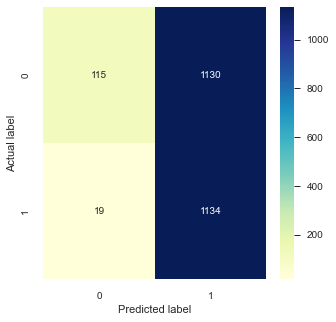

In [59]:
def plot_conf_matrix(conf_matrix):
    plt.figure(figsize=(5,5))
    sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu" ,fmt='g')    
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
plot_conf_matrix(cm)

En esta gráfica se puede evidenciar la gran cantidad de **FP**. Un total de 1130 pacientes fueron clasificados como no elegible cuando si eran elegibles. Mientras que solo 115 que fueron predecidos como elegibles si son elegibles

### Redes neuronales - Por: Juan Sebastián Ramírez 201923800

In [60]:
confusion_matrix(Y_test_redes, y_pred_redes)
y_pred_train_redes = neural_network.predict(X_train_redes)
y_pred_test_redes = neural_network.predict(X_test_redes)
print(classification_report(Y_test_redes, y_pred_test_redes))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1245
           1       0.80      0.83      0.81      1153

    accuracy                           0.82      2398
   macro avg       0.82      0.82      0.82      2398
weighted avg       0.82      0.82      0.82      2398



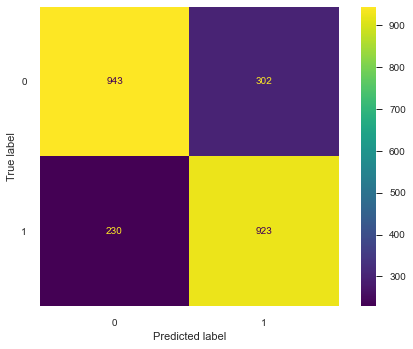

In [61]:
plot_confusion_matrix(tree, X_test_redes, Y_test_redes)  
plt.show() 

## Análisis de resultados

In [62]:
print('Exactitud: %.2f' % accuracy_score(Y_test_redes, y_pred_redes))
print("Recall: {}".format(recall_score(Y_test_redes,y_pred_redes, average='micro')))
print("Precisión: {}".format(precision_score(Y_test_redes,y_pred_redes, average='micro')))
print("Puntuación F1: {}".format(f1_score(Y_test_redes,y_pred_redes, average='micro')))

Exactitud: 0.82
Recall: 0.8165137614678899
Precisión: 0.8165137614678899
Puntuación F1: 0.81651376146789


### Mandando todos los resultados a Excel
De esta manera se van a poder procesar mejor por medio de los tableros de control

In [63]:
dt_datos_test = pd.DataFrame(y_pred_test_redes)
dt_datos_test.to_csv("datos_test.csv")

In [64]:
dt_arbol_final = pd.DataFrame(y_pred_test_arbol_oficial)
dt_arbol_final.to_csv("predicciones_arbol.csv")

In [65]:
dt_knn_final = pd.DataFrame(y_pred_knn)
dt_knn_final.to_csv("predicciones_knn.csv")

In [66]:
dt_redes_final = pd.DataFrame(y_pred_test_redes)
dt_redes_final.to_csv("predicciones_redes.csv")